# Logistic Regression with the iris dataset

This notebook aims to apply the logistic regression classification model. The iris dataset will be used to construct two and three classes classification models based on these features:

- Two features (Sepal_Length, Sepal_Width)

- Two features (Pepal_Length, Pepal_Width)

- Four features (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width)


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris


## Importing libraries

In [64]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

## Importing data

In [65]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "datasets/iris/iris.csv"

# Load the dataset from HHDD
df  = pd.read_csv(url, header = None, names = colnames )


## Exploring the content of the data set

Get a general 'feel' of the data


In [66]:
df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
# Number of predictors/variables/features and obsertations in the dataset
Nr, Nc = df.shape
print("Number of observations (rows)  = {0:0d}".format(Nr))
print("Number of variables(columns)   = {0:0d}".format(Nc))

print(df.columns)


Number of observations (rows)  = 150
Number of variables(columns)   = 5
Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


#### Characteristics of the dataset


1. The dataset description
    - Many observations/measurements/recordings of the characteristics/attributes/variables of some iris flowers
    - Three iris varieties are used: setosa, versicolor, virginica
    - Variables: sepal and petal length and width (4 variables) plus the type of flower (1 variable)
    - Total numer of observations: 150 (50 for each type of flower)

2. Description of the predictors/variables/features/attributes (independant variable)
    - Sepal_Length, Sepal_Width, Petal_Length, Petal_Width


3. Description of the response (dependant variable)
    - Flower type: setosa, versicolor, virginica


In [68]:
# Summary statistics for the quantitative variables
df.describe()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
# Summary statistics for the cualitative dependent variables

# Categories
print( df['Flower'].unique() )

# Count for each category
print( df['Flower'].value_counts() )

# Proportion of data for each category
Nc1      = len(df[df['Flower']=='Iris-setosa']) 
Nc2      = len(df[df['Flower']=='Iris-versicolor'])
Nc3      = len(df[df['Flower']=='Iris-virginica'])
Ntotal   = Nc1 + Nc2 + Nc3

pct_Nc1  = Nc1/Ntotal
pct_Nc2  = Nc2/Ntotal
pct_Nc3  = Nc3/Ntotal
print("Proportion of setosa     is {0:0.1f}%".format(pct_Nc1*100))
print("Proportion of versicolor is {0:0.1f}%".format(pct_Nc2*100))
print("Proportion of virginica is {0:0.1f}%".format(pct_Nc3*100))


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Flower, dtype: int64
Proportion of setosa     is 33.3%
Proportion of versicolor is 33.3%
Proportion of virginica is 33.3%


The dataset is balanced: the numer of observation for each class is te same: 33%

In [70]:
# Encoding the class label categorical column: from string to num
df = df.replace({"Flower":  {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3} })

# Visualize the dataset
df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Now the label/category is numeric

In [71]:
# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
Label2Remove = 1 # (1,2,3)
df = df[df.Flower!=Label2Remove]
df

# NOTE: comment this if cell if you want to use the three classes


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
50,7.0,3.2,4.7,1.4,2
51,6.4,3.2,4.5,1.5,2
52,6.9,3.1,4.9,1.5,2
53,5.5,2.3,4.0,1.3,2
54,6.5,2.8,4.6,1.5,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


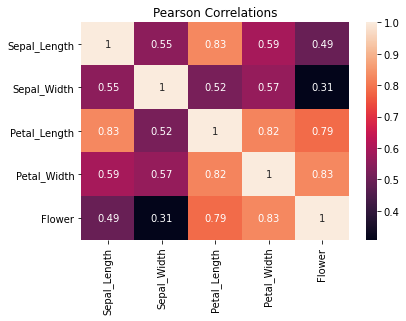

In [72]:
# Calculate correlation between variables
ax = sns.heatmap(df.corr(), annot=True).set(title='Pearson Correlations');


This shows the correlation between variables. See how **Flower** is highly positive correlated with **Sepal_Lenght**, **Petal_Lenght**, and **Pepal_Widht**, and negative correlated with **Sepal_Widht**.

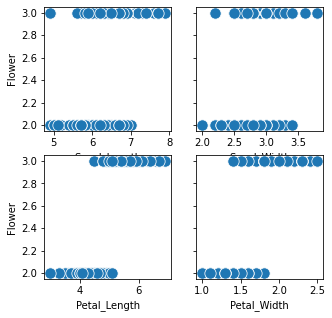

In [73]:
# Scatter plot of the data: each feature versus flower

fig, axes = plt.subplots(2, 2, figsize=(5, 5), sharey=True)
#fig.suptitle('Scatter plots')

# Sepal_Length
sns.scatterplot(ax=axes[0,0], data=df, x="Sepal_Length", y="Flower", s=128)
#axes[0,0].set_title("Sepal_Length")

# Sepal_Width
sns.scatterplot(ax=axes[0,1], data=df, x="Sepal_Width", y="Flower", s=128)
#axes[0,1].set_title("Sepal_Width")

# Petal_Length
sns.scatterplot(ax=axes[1,0], data=df, x="Petal_Length", y="Flower", s=128)
#axes[1,0].set_title("Petal_Length")

# Petal_Width
sns.scatterplot(ax=axes[1,1], data=df, x="Petal_Width", y="Flower", s=128)
#axes[1,1].set_title("Petal_Length")

plt.show()


## Problem description

Given a feature vector we want to decide which class or category it belongs to

- Feture vector: $x = [x_1,x_2,...,x_p]^{T}$, $X \in \Re^{p}$

- Set of labels/classes: $\{c_1,c_2,...,c_K\}$

This is a classifiction problem which:

- Learns a function (based on the examples) that maps and input to an output

- Requires a dataset of examples with observations and the labels of each observations

- Once the classifier is learned (the function): we apply the function of a new unknown observation ($x$) to decide which class it belongs to


## Description of the logistic regression classification model

With the logistic regresion function we model the probability of each class given a feature vector or observation, that is:

$$ Pr(Y = k|X = x), \, \, for \, \, k=1,2,...,K $$ 

where $K$ is the numer of classes and $x = [x_1,x_2,x_3,...,x_p]$ is the feature vector or observation.

We model the conditional distribution of the response $Y$ (the class), given the predictor $X$ (i.e., the features/variables)

For two classes and $p$ predictors, the probability of one class given is:

$$ p(y=1|x) = p(x) = \frac{ e^{\beta_0+\beta_1 x_1+...+\beta_p x_p} }{ e^{\beta_0+\beta_1 x_1+...+\beta_p x_p} +1 }$$

while the probability of the other class is simply:

$$ p(y=0|x) = 1 - p(y=1|x) $$

Important concepts:

- Odds
- Log odds or logit


## Training the logistic regression classifier using sklearn

Fitting the linear reggresion model using sklearn

In [74]:
# Import sklearn classification model
from sklearn.linear_model import LogisticRegression

# Select variables (one, two, three, four?)
#X  = df[["Sepal_Length", "Sepal_Width"]].values
X  = df[["Petal_Length", "Petal_Width"]].values
#X  = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values

# Get the class of each observation
y  = df["Flower"].values

# Fit the model
clfmodel   = LogisticRegression(C=1e5)
clfmodel.fit( X , y )


LogisticRegression(C=100000.0)

In [75]:
# Get model intercept
b0 = clfmodel.intercept_
print("The intercep b0 is", b0)


The intercep b0 is [-45.2677155]


In [76]:
# Get model coefficient (slope) 
b1 = clfmodel.coef_[0]
print("The slope coefficients bi are", b1)


The slope coefficients bi are [ 5.75410216 10.44515355]


## Understanding the model

The estimated coefficients $\hat{\beta_j}$, $j=0,1,2,3,4$ were calculated from the data.



The final logistic regression model for the case of the two features from the sepal (Sepal_Length, Sepal_Width) is:

$$ p(x) = \frac{ e^{\beta_0+\beta_1 x_1+\beta_2 x_2} }{ e^{\beta_0+\beta_1 x_1+\beta_2 x_2
} +1 }$$

$$ p(x) = \frac{ e^{-119.06+43.93x_1-37.16x_2} }{ e^{-119.06+43.93x_1-37.16x_2} +1 }$$



The final logistic regression model for the case of the two features from the petal (Petal_Length, Petal_Width) is:

$$ p(x) = \frac{ e^{\beta_0+\beta_1 x_1+\beta_2 x_2} }{ e^{\beta_0+\beta_1 x_1+\beta_2 x_2
} +1 }$$

$$ p(x) = \frac{ e^{-32.54+8.93x_1-13.90x_2} }{ e^{-32.54+8.93x_1-13.90x_2} +1 }$$



The final logistic regression model for the case of the four features (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) is:

$$ p(x) = \frac{ e^{\beta_0+\beta_1 x_1+\beta_2 x_2+\beta_3 x_3+\beta_4 x_4} }{ e^{\beta_0+\beta_1 x_1+\beta_2 x_2+\beta_3 x_3+\beta_4 x_4
} +1 }$$

$$ p(x) = \frac{ e^{-1.01-1.84x_1-6.24x_2+9.86x_3+5.04x_4} }{ e^{-1.01-1.84x_1-6.24x_2+9.86x_3+5.04x_4} +1 }$$

## Make predictions

Make predictions using a new observation $[x_1,x_2]$ or $[x_1,x_2,x_3,x_4]$ according to the features used to train the model

In [79]:
# Define one input x and compute the output using regmodel
xnew = [4.8, 2.8]
#xnew = [6, 3, 4, 1]
ynew = clfmodel.predict([xnew])
ynew


array([3], dtype=int64)

In [80]:
# Predicted probability of the two classes
ynew_prob = clfmodel.predict_proba([xnew])
print(ynew_prob)
sum(sum(ynew_prob))


[[9.18063665e-06 9.99990819e-01]]


1.0

In [81]:
# Predicted probability of the first class
ynew_prob_class1 = ynew_prob[:,0]
print(ynew_prob_class1)

# Predicted probability of the second class
ynew_prob_class2 = ynew_prob[:,1]
print(ynew_prob_class2)

# Compute the class
if ynew_prob_class2>=0.5:
    ynew=2
else:
    ynew=1
print(ynew)


[9.18063665e-06]
[0.99999082]
2


Define a function to make predictions

In [82]:
def Iris2ClassesLogisticFunction(x1,x2):
#def Iris2ClassesLogisticFunction(x1,x2,x3,x4):
    
    # Using the two sepal features
    lin  = -119.05865816 +43.92969885*x1 -37.15943689*x2
    
    # Using the two petal features
    #lin  = - 32.53965211 + 8.92582763*x1 +13.90392467*x2
    
    # Using the four features
    #lin  = -1.01386289 -1.84213212*x1 -6.24086579*x2 + 9.85618514*x3 + 5.03835615*x4
    
    num  = np.exp(lin)
    den  = np.exp(lin) + 1    
    px   = num/den
    
    # Define the class
    if px>=0.5:
        y=2
    else:
        y=1
    
    return y


In [83]:
# Predict a value
xnew = [6, 3]
Ynew = Iris2ClassesLogisticFunction(xnew[0],xnew[1])

#xnew = [6, 3, 4, 1]
#Ynew = Iris2ClassesLogisticFunction(xnew[0],xnew[1],xnew[2],xnew[3])

Ynew


2

## How well does the model perform with the train data?


In [86]:
# Compute predictions using the training data
y_pre = clfmodel.predict(X)

y_pre.shape


(100,)

In [87]:
print(y[0:10])
print(y_pre[0:10])


[2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2]


In [88]:
print(y[40:60])
print(y_pre[40:60])

[2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
[2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3]


It seems that all training data was perfectly learened and classified by the model.

Let's compute the accuracy

In [89]:
# Accuracy

# Define a function to compute accuracy
def My_Accuracy(actual, predicted):
    acc = np.sum(np.equal(actual, predicted)) / len(actual)
    return acc

#def My_Accuracy(actual, predicted):
#    correct = 0
#    for i in range(len(actual)):
#        if actual[i] == predicted[i]:
#            correct += 1
#    return correct / float(len(actual)) * 100.0


In [90]:
acc1 = 100 * My_Accuracy(y, y_pre)
acc1


94.0

In [91]:
from sklearn.metrics import accuracy_score

acc2 = 100*accuracy_score(y, y_pre)
acc2


94.0

Note how all the training data was perfectly learned by the model ¡¡

However, we cannot use the training set to evaluate our classification model because the performance result would be biased. Examples?

Remarks:
- Overfitting?
- Generalization?
- Performance for each class
- More performance metrics

Conclusion: we need a test set (unknown examples)

So will answer the question **How well does the model perform with the test data?**

# Final remarks

- Logistic regresion is a classification model ¡

- Logistic regresion compute the probability of each class given a new set of observation $Pr(Y = k|X = x) \, \, for \, \, k=1,2,...,K$ using the logistic function

- In statistical jargon, we model the conditional distribution of the response $Y$, given the predictor(s) $X$
